In [1]:
import datetime as dt
import os, sys
import netCDF4 as nc
import matplotlib as mpl
import numpy as np
import numpy.ma as ma
from scipy.spatial import distance
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.patches import Ellipse
from matplotlib import cm
import matplotlib.colors as mpl_colors
from matplotlib import rc
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pandas as pd
import matplotlib.mlab as mlab


from salishsea_tools import geo_tools, viz_tools

get_ipython().magic('matplotlib inline')

In [2]:
matplotlib.rcParams['font.size'] = 14

matplotlib.rcParams['axes.titlesize'] = 18

In [3]:
#Parameters

cmap = plt.get_cmap('nipy_spectral')
cmap.set_bad('burlywood')

In [4]:
def plot(points, title = 'title', picname = "noname"):
    
    Iona = (-123.30898284912109, 49.187351226806641)
    S15 = (-123.3114, 49.130412)
    S16 = (-123.317415, 49.1214)
    xl=(-126.2,-122.2)
    yl=(47.1,51)




    #prepare plot and constants
    plt.clf()
    start = dt.datetime.now()
    print ("start: ", start)
    mesh = nc.Dataset("/ocean/gsgarbi/mesh_mask_downbyone2.nc")
    tmask=np.copy(mesh.variables['tmask'])
    mesh.close()
    fb=nc.Dataset('/ocean/eolson/MEOPAR/NEMO-forcing/grid/bathy_downonegrid2.nc')
    nav_lon=np.copy(fb.variables['nav_lon'])
    nav_lat=np.copy(fb.variables['nav_lat'])
    fb.close()
    
    lonlim=[np.min(nav_lon),np.max(nav_lon)]
    latlim=[np.min(nav_lat),np.max(nav_lat)]


    griddata=0.0*tmask[0,0,:,:]

    np.shape(points)[0]



    griddata, iedges, jedges = np.histogram2d(points[:,1],points[:,2],bins=[100,200],range=[lonlim,latlim])


    Jedges,Iedges=np.meshgrid(jedges,iedges)
    


    fig, axs = plt.subplots(1,1,figsize=(9,8))
    mesh0 = axs.pcolormesh(Iedges,Jedges,griddata,cmap=cmap)
    mesh0.set_clim(vmin = 0, vmax = 40)
    axs.set_xlim(xl)
    axs.set_ylim(yl)
    pos=axs.get_position()
    pos2=(pos.bounds[0],pos.bounds[1],pos.bounds[2]-.05,pos.bounds[3])
    axs.set_position(pos2)
    axs2 = plt.axes(pos2)
    viz_tools.set_aspect(axs,coords='map')
    mesh1=axs2.pcolormesh(nav_lon,nav_lat,np.ma.masked_where(tmask[0,0,:,:]==1,tmask[0,0,:,:]),cmap='YlOrRd')
    axs2.set_xlim(xl)
    axs2.set_ylim(yl)
    axs2.patch.set_alpha(0)
    viz_tools.set_aspect(axs2,coords='map')
    axsCB=plt.axes((pos2[0]+pos2[3],pos2[1],.02,pos2[3]))
    cbar = fig.colorbar(mesh0,cax=axsCB)
    cbar.set_label ("Counts")
    
    axs.set_title(title)

    
    plt.savefig(picname)
    
    print ("We have a total of {} trajectories".format(np.sum(griddata)))

In [5]:
def separate(nday):
    year1 = []
    year2 = []
    year3 = []

    for file in dirs:
        month = np.load(open(filesdir + file + "_{}d.npy".format(nday) , 'rb'))
        year1 += month [0::3]
        year2 += month [1::3]
        year3 += month [2::3]
        
    return (year1, year2, year3)




In [6]:
def plot_hist (pts, nday, init_depth):
    
    
    npyear=np.array(pts)

    df=pd.DataFrame(data=npyear[:,1:],index=npyear[:,0],columns=['Lon','Lat','Z','tind'])

    df2=df[(df.Lat>49.1) & (df.Lat<49.35)]
    
    fig, axs = plt.subplots(1,1,figsize=(9,8))

    axs.hist(df2['Z'],50,orientation='horizontal')
    
    
    
    plt.xlabel('Count')
    plt.ylabel('Depth (m)')
    
    title = ("Length of trajectory: {} days\n"
                    "Initial depth: {}m".format(nday, init_depth))
    
    plt.title ( title )
    
    plt.savefig( "/ocean/gsgarbi/analysis-giorgio/2017apr20_presentation/hist_{}d_{}m".format(nday, init_depth) )

In [7]:
def plot_hist_together (pts1, pts2, pts3, nday, init_depth):
    
    fig, axs = plt.subplots(1,1,figsize=(9,8))
    
    colors = ['lightblue', 'salmon', 'yellow']
    
    labels = ["45m", "59m", "77m"]
    
    idepth = [45, 59, 77]
    
    ls = ['dashed', 'dotted', None]
    
    fc = [(0, 0, 1, 0.5), (1, 0, 0, 0.5), (0, 0, 0, 0.5)]
    
    bin_num = 50
    
#     alphas = [0.2, 0.4, 0.8]
    
    for i, pts in enumerate([pts1, pts2, pts3]):
        npyear=np.array(pts)

        df=pd.DataFrame(data=npyear[:,1:],index=npyear[:,0],columns=['Lon','Lat','Z','tind'])

        df2=df[(df.Lat>49.1) & (df.Lat<49.35)]
        
        

        axs.hist(df2['Z'], bin_num, ls=ls[i], lw=3, fc=fc[i], orientation = 'horizontal')
        

        plt.xlabel('Count')
        plt.ylabel('Depth (m)')
    
    title = ("Length of trajectory: {} days\n"
                    "Initial depth: {}m".format(nday, init_depth))
    
    plt.title ( title )
    
    plt.savefig( "/ocean/gsgarbi/analysis-giorgio/2017apr20_presentation/hist_{}d_{}m".format(nday, init_depth) )

In [15]:
def alt_plot (pts1, pts2, pts3, nday, init_depth):
#     bins = numpy.linspace(-10, 10, 100)

    print ('start')
    

# plt.style.use('seaborn-deep')

#     x = np.random.normal(1, 2, 5000)
#     y = np.random.normal(-1, 3, 5000)
#     data = np.vstack([x, y]).T
#     bins = np.linspace(-10, 10, 30)

#     plt.hist(data, bins, alpha=0.7, label=['x', 'y'])
#     plt.legend(loc='upper right')
#     plt.show()


    
    colors = ['lightblue', 'salmon', 'yellow']
    
    labels = ["45m", "59m", "77m"]
    
    idepth = [45, 59, 77]
    
    ls = ['dashed', 'dotted', None]
    
    fc = [(0, 0, 1, 0.5), (1, 0, 0, 0.5), (0, 0, 0, 0.5)]
    
    bin_num = 50
    
    bins =[-400, 0, 50]
    
#     alphas = [0.2, 0.4, 0.8]

    arraylist = []
    
    for i, pts in enumerate([pts1, pts2, pts3]):
        
        print ('check1')
        
        print (len(pts))
        npyear=np.array(pts)

        df=pd.DataFrame(data=npyear[:,1:],index=npyear[:,0],columns=['Lon','Lat','Z','tind'])

        df2=df[(df.Lat>49.1) & (df.Lat<49.35)] # when we do this we get different shapes 
        

        
        
        arraylist.append(df2['Z'])
        
                
        print (np.shape(df2['Z']))
        
        print ('check2')


    outarr=np.ones((np.max([len(ps) for ps in arraylist]),len(arraylist)))*np.nan #define empty array
    for i,c in enumerate(arraylist):  #populate columns
        outarr[:len(c),i]=c
        
    print (np.shape(outarr))
        
        
        

    fig,ax=plt.subplots(1,1,figsize=(4,8))
    ax.hist(outarr, bin_num, alpha=0.5, label=labels,
    orientation="horizontal")



    print ('check3')

    ax.legend(loc='lower right')
    ax.set_xlabel('Count')
    ax.set_ylabel('Depth (m)')


    title = ("Length of trajectory: {} days\n"
             "Initial depths(m): {}".format(nday, init_depth))

    ax.set_title ( title )

    plt.tight_layout()

    fig.savefig("/ocean/gsgarbi/MEOPAR/private-docs/reports/IonaProject/ionafigs/{}d_alldepths.png".format(nday))

In [9]:
def create_array(filesdir, nday):
    
    dirs = os.listdir(filesdir)

    dirs.sort()

    pts = []

    for file in dirs:
        if "{}d.npy".format (nday) == file [18:]: #select length

            array = np.load(open(filesdir + file, 'rb'))

            pts.append(array)

    pts = np.array([i for sublist in pts for i in sublist])

    
    return pts

start
check1
9216
(7071,)
check2
check1
9216
(7369,)
check2
check1
9216
(7747,)
check2
(7747, 3)
check3


/ocean/gsgarbi/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:583: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/ocean/gsgarbi/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:584: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


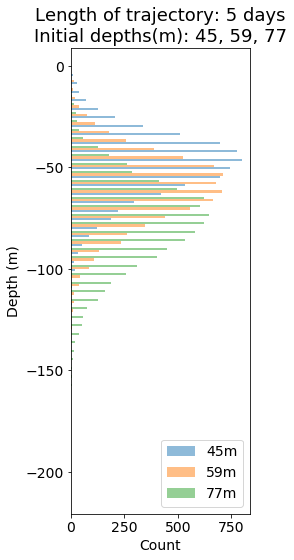

start
check1
9216
(5322,)
check2
check1
9216
(5449,)
check2
check1
9216
(5900,)
check2
(5900, 3)
check3


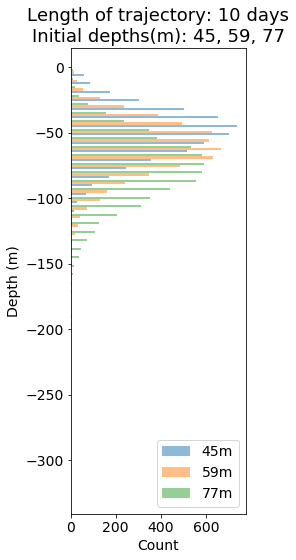

start
check1
9216
(4159,)
check2
check1
9216
(4386,)
check2
check1
9215
(4674,)
check2
(4674, 3)
check3


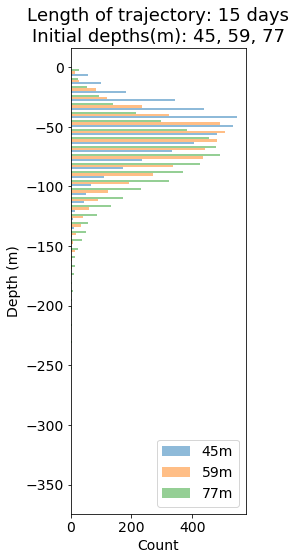

start
check1
9216
(3585,)
check2
check1
9216
(3822,)
check2
check1
9215
(3976,)
check2
(3976, 3)
check3


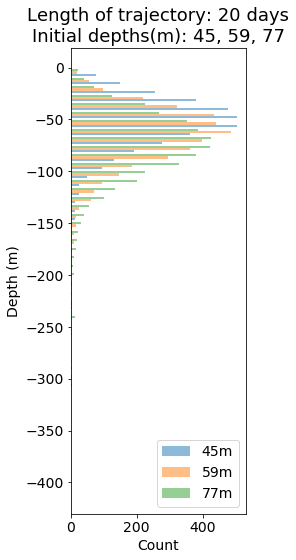

start
check1
9216
(3349,)
check2
check1
9216
(3515,)
check2
check1
9215
(3643,)
check2
(3643, 3)
check3


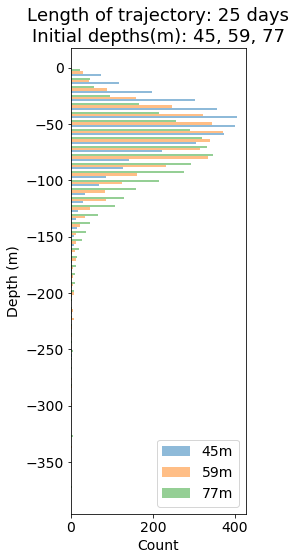

start
check1
9216
(3086,)
check2
check1
9216
(3304,)
check2
check1
9215
(3303,)
check2
(3304, 3)
check3


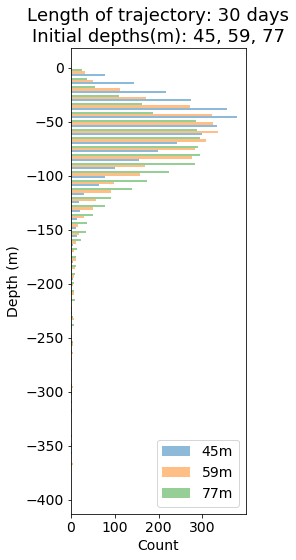

start
check1
9216
(2829,)
check2
check1
9216
(3028,)
check2
check1
9215
(3109,)
check2
(3109, 3)
check3


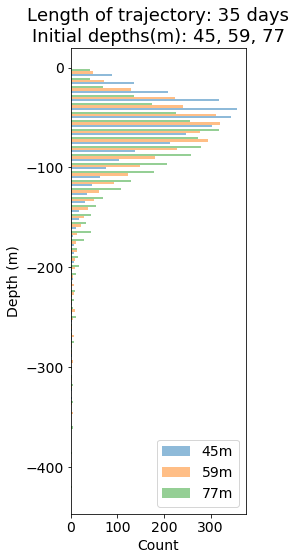

start
check1
9216
(2653,)
check2
check1
9216
(2829,)
check2
check1
9215
(2876,)
check2
(2876, 3)
check3


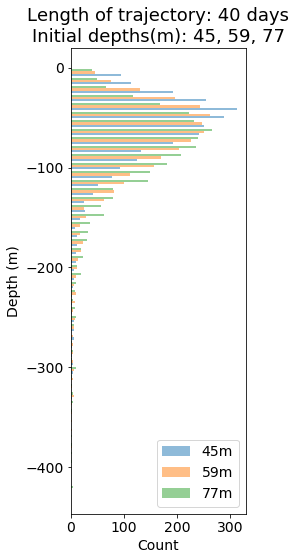

start
check1
9216
(2556,)
check2
check1
9216
(2691,)
check2
check1
9215
(2780,)
check2
(2780, 3)
check3


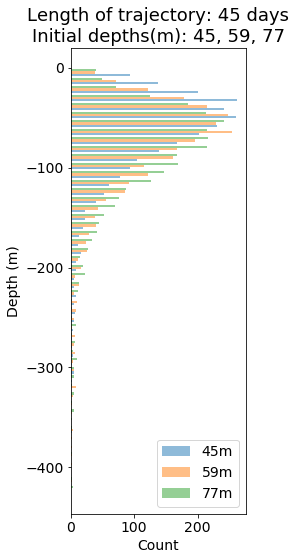

start
check1
9216
(2385,)
check2
check1
9216
(2613,)
check2
check1
9215
(2668,)
check2
(2668, 3)
check3


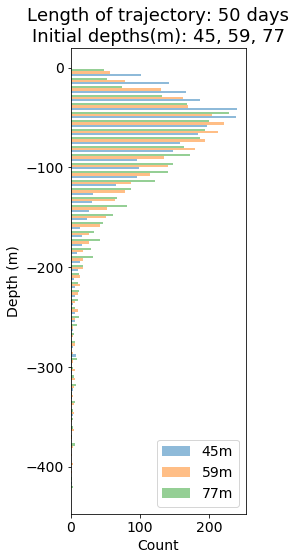

start
check1
9216
(1911,)
check2
check1
9215
(2039,)
check2
check1
9215
(1808,)
check2
(2039, 3)
check3


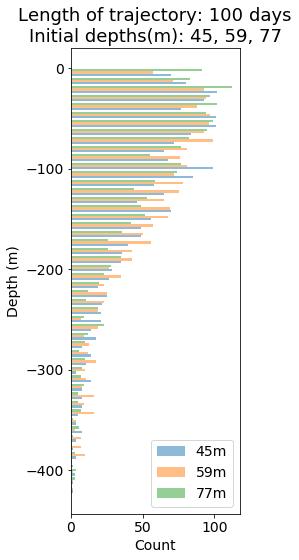

In [16]:
for nday in range (5,51,5):

    array = create_array("/ocean/gsgarbi/selected_days/", nday)

    year1 = array[0::3]
    year2 = array[1::3]
    year3 = array[2::3]

    init_depth = "45, 59, 77"
    alt_plot(pts1 = year1, pts2 = year2, pts3 = year3, nday = nday, init_depth = init_depth)
    
    plt.show()
    

nday = 100

array = create_array("/ocean/gsgarbi/selected_days/", nday)

year1 = array[0::3]
year2 = array[1::3]
year3 = array[2::3]

init_depth = "45, 59, 77"
alt_plot(pts1 = year1, pts2 = year2, pts3 = year3, nday = nday, init_depth = init_depth)

plt.show()

In [11]:
plt.show()

<b>5 days<b>

In [12]:
nday = 5

dirs = dirs [0:12]

###uncomment for test: 
# dirs = dirs [0:2]

syear = separate(nday)

perm5 = syear

year1 = syear[0]
year2 = syear[1]
year3 = syear[2]

NameError: name 'dirs' is not defined

In [ ]:
init_depth = "45, 59, 77"

In [ ]:
alt_plot(pts1 = year1, pts2 = year2, pts3 = year3, nday = nday, init_depth = init_depth)

<b>50 days</b>

In [ ]:
nday = 50

syear = separate(nday)

perm50 = syear

year1 = syear[0]
year2 = syear[1]
year3 = syear[2]

In [ ]:
alt_plot(pts1 = year1, pts2 = year2, pts3 = year3, nday = nday, init_depth = init_depth)

<b> 100 days </b>

In [ ]:
nday = 100

# ###uncomment for test: 
# dirs = dirs [0:3]

syear = separate(nday)

perm100 = syear

year1 = syear[0]
year2 = syear[1]
year3 = syear[2]